##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`, and `seaborn` libraries.

Load in the [dataset](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as a dataframe named "voters".

##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1: How did the demographic of voter registration changed between 2016 and 2020?
* Question 2: How has the voter registration rates in Texas Changed in 2016 vs 2020



The purpose of this project is to analyze how the amount of new registered voters in 2016 and 2020 has changed and determine how the trends each year. The goal of this project is to analyze why there are differences in new voter registration patterns between the two years and idenitfy how the government organization can inmprove outreach to potential voters. This notebook is important because engaging adults in politics and voting is extremely important to the betterment of the country and political climate. By identifying trends we can establish why certain events occur.

This Notebook is looking to answer two questions about voting trends, both on the national level and state level. This is important because National level trends may differ tremendiously from state trends, as you will see in this notebook.

The questions we will try to answer today are:

* Question 1: How did the demographic of voter registration changed between 2016 and 2020?
* Question 2: How has the voter registration rates in Texas Changed in 2016 vs 2020

In [ ]:
#importing libraries and loading in dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")


## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

The names of the variables are:
- Juristiction (Categorical) : the area voters are regustered in
- Year (Categorical) : Year that voters registered
- Month (Categorical) : Month that voters registered
- New Registered Voters (Numeric) : Number of people who registered to vote


In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

There is a no missing data

In [ ]:
voters.isnull().sum()

,0
Jurisdiction,0
Year,0
Month,0
New registered voters,0


Check your data types. (1 point)

Jurisdiction and Month are objects
Year and New Registered Voters are integers

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters = voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})
voters.head(5)

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Explain any potential limitations to your data _(2 points)_

The limitations inclide the fact that this particular data set has very limited variables, addtionally the data is very objective, just numbers and dates which isn't helpful when trying to understand why certain trends are happening.

Additionally the "Jurisdiction" or "NAME" column is particularly vague, only telling us the name of the state, which is very brad since there are many different political enviornments within a state. I would have prefered to see a district column as well. This alone would greatly improve our understanding of the data and demographic. Also not every state is represented in this dataframe.

The idea of new registration is also very vague, it doesn't account for loss of voters as well as the already registered voters.



###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
voters.loc[voters["registered_voters"].idxmax()]
#by using idxmax we are giving all the indexes associated with the highest "registered voters" value
#the highest amount of new voter registration is in February 2020 in the state of California

,13
NAME,California
Year,2020
Month,Feb
registered_voters,238281


What is the average voter registration? (1 points)

In [ ]:
mean_voters = voters["registered_voters"].mean()
print(mean_voters.round(0)," is the average voter regstration")
# displays average number of voter registration in each jurisdiction across the entire dataset as a whole number
# 48,223 is the average voter registration across the board

48223.0  is the average voter regstration


Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters[voters["registered_voters" ]>mean_voters]
display(high_voters)
high_voters.count()
#there are 36 instances where voter registration was higher than the average

,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


,0
NAME,36
Year,36
Month,36
registered_voters,36


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
state_above_average = high_voters["NAME"].value_counts() #new dataset since it helps answer multiple questions
state_above_average.sort_values(ascending=False) # sorts the states by number of times they go above national average
display(state_above_average)

,count
NAME,
Texas,8
Florida,7
California,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

- Texas
- Florida
- California

in that order

In [ ]:
state_above_average.head(3)

,count
NAME,
Texas,8
Florida,7
California,7


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* Hide the legend by passing legend=false through the plot code (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette and that makes sense for your data. (1 point)
* Comment on the trends you see (2 points)
(9 points total)

In [ ]:
total_voters_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index().sort_values(by="registered_voters", ascending=False)
total_voters_by_state.head(5)

,NAME,registered_voters
1,California,1156363
10,Texas,1146101
9,North Carolina,560408
5,Florida,526945
7,Illinois,454723


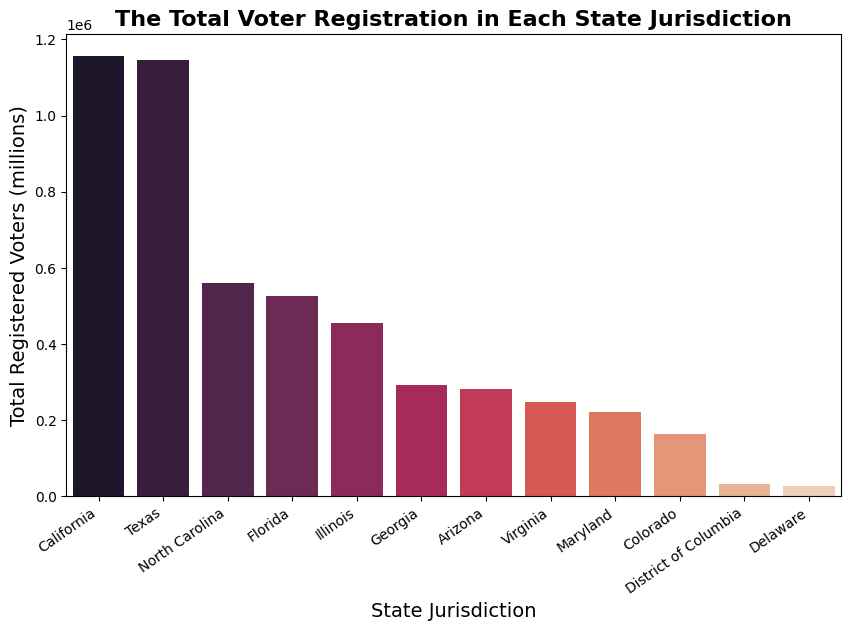

In [ ]:
#Plotting the graph, used rocket pallet, hid legend, color gets lighter as y-value decreases
plt.figure(figsize=(10,6))
sns.barplot(data = total_voters_by_state, x = "NAME", y="registered_voters", palette ="rocket", hue="NAME", legend=False)

#adding labels and titles
plt.title("The Total Voter Registration in Each State Jurisdiction",fontsize=16,weight="bold")
plt.ylabel("Total Registered Voters (millions)", fontsize=14)
plt.xlabel("State Jurisdiction", fontsize=14)
plt.xticks(rotation=35, ha="right")

#show table
plt.show()

# the larger and more populated states have more new voters
# these states also have a lot of electoral college votes which may explain why theres more new voters
# these states have a particularly large population of young adults who may be voting for the first time

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

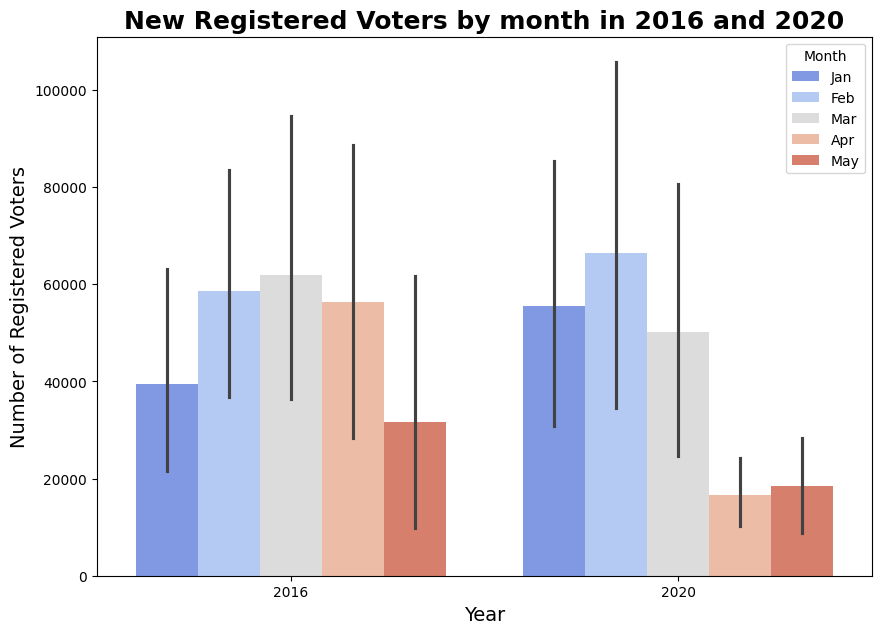

In [ ]:
#Graph, used coolwarm since i think it suits the different months
plt.figure(figsize=(10,7))
sns.barplot(voters, x="Year", y="registered_voters", palette="coolwarm", hue="Month", legend=True)

#axis and titles
plt.title("New Registered Voters by month in 2016 and 2020", fontsize=18, weight = "bold")
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of Registered Voters", fontsize = 14)

#Show graph
plt.show()

# There are generally more new voters in the beginning of the year
# More notiably in april may of of 2016 there are still alot of new voters registering
# In 2020 most new voters come from January and February
# Could this be due to the announcement of the two party nominees?
# huge spike in february of 2020 could it be due to political tensions?

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

Question: How has the new voter registration rates in Texas Changed in 2016 vs 2020

- There was a small spike in voter registration in March 2016
- Overall new voter registration as decreased in Texas since 2016
- This may be due to the huge spike of voter turnout during Trump vs Clinton elections, Trump was an alonomly at the time, gaining a huge following particularly in red states. In 2020 the favorite to win for the democrats was Joe Biden who was likely unpopular in Texas while Trump maintained his voters possibly resulting in lower new voter turnout.


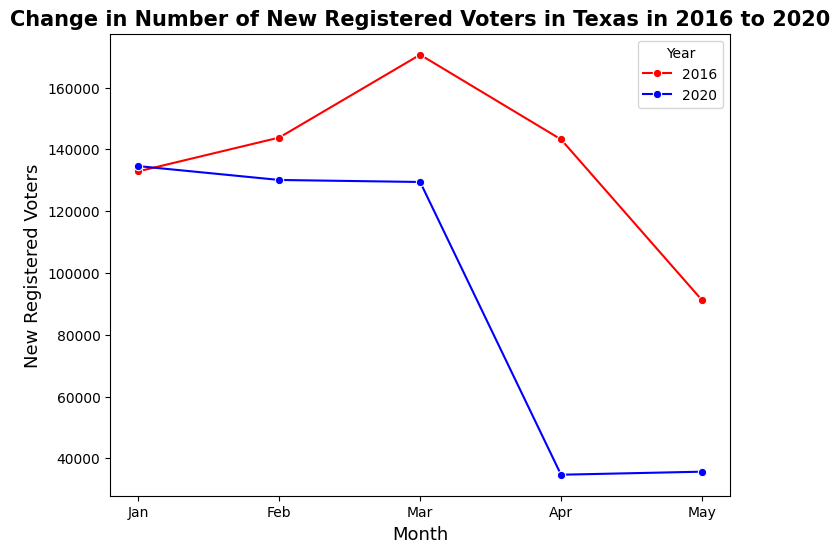

In [ ]:
#New data
texas_voters = voters.loc[voters["NAME"]=="Texas"]

plt.figure(figsize=(8,6))
sns.lineplot(texas_voters, x="Month", y="registered_voters", palette = ["red","blue"], hue = "Year", marker= "o")

plt.title("Change in Number of New Registered Voters in Texas in 2016 to 2020", fontsize = 15, weight = "bold")
plt.xlabel("Month", fontsize = 13)
plt.ylabel("New Registered Voters", fontsize = 13)

plt.show()

##Notebook Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)

This should only be reflective of *your data* as presented here.


Each section should be at least 3-4 complete sentences.

#**answers:**

- Through this analysis, it had been made evident that the voter registration has increased pretty signifigantly overall between the years 2016 and 2020. Noteworthy spikes happen to correlate with intense political dissary of the country. This is particularly evident for the analysis of Texas, where there are very obvious spikes in voter registration in times of big political changes. The spikes in Texas voter registration just so happen to align with when Donald Trump gained momentum in the presidential race. This is further proved by the fact that Trump's Texas votes did not change between 2016 and 2020 and the graphs show that there wasn't signifigant increase in new texan voters in 2020.

- Based on these results I would suggest that government organiations should be promoting voter registration all around the year to maintain consistant voterbase. It is important to keep the engagement because it is evident by the grapha that voter registration slows down greatly as the year goes by. This may risk uninformed voting since the majority of new voters are registering so early or very late. Maybe the government organization should also make voter registration even more accessible for young adults since they make up the majority of new voters.

- My suggestion for possible next steps are to collect more detailed data prior to analysis. This analysis was lacking a lot of nuance due to not knowing voter demographics such as age, race, and geneder holds the analysis back. Not having data on almost half the states cuts out a huge portion of the story and leads to missing out on the larger nationwide trends. By collecting more detailed data, we'd be able to make more impactful analysis which may be used to predict what future voter registration may look like and what the next steps are to guide turnout in the right direction.



Despite the limitations of our dataset

##Stakeholder Analysis(14 points as noted)
*Loosely adapted from the [Cambridge Analytica/Facebook reveal](https://www.google.com/search?q=cambridge+analytica+facebook+&sca_esv=d43255849d412494&rlz=1C1ONGR_enUS1069US1069&sxsrf=AE3TifP9Zpi1D8vk3Z__wLxSQ-IMSAubZg%3A1758661179884&ei=OwrTaMHdNYmx5NoPkdTiqQY&ved=0ahUKEwiB56C34--PAxWJGFkFHRGqOGUQ4dUDCBA&uact=5&oq=cambridge+analytica+facebook+&gs_lp=Egxnd3Mtd2l6LXNlcnAiHWNhbWJyaWRnZSBhbmFseXRpY2EgZmFjZWJvb2sgMgoQIxiABBgnGIoFMgUQABiABDIIEAAYgAQYxwMyCBAAGIAEGMcDMggQABiABBjHAzIFEAAYgAQyCBAAGIAEGMcDMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeSJoJUI4DWI4DcAF4AZABAJgBa6ABa6oBAzAuMbgBA8gBAPgBAZgCAqAChAHCAgoQABiwAxjWBBhHmAMAiAYBkAYIkgcDMS4xoAelCLIHAzAuMbgHc8IHBTItMS4xyAcV&sclient=gws-wiz-serp) in 2018. While it is not necessary to look this up, it's always good to know*.

All answers should be in full sentences and in a text box, not code.

You work for a social media company which is currently allowing third party apps access to data through the use of an API; this means another company can create an app on your platform and acces the data of users who consent.

One such company is a lobbying group. They create a third party app called "Get Out and Vote!" that asks users about their voter registration and other habits. While users of the app must give consent, the app also allows the lobbying group to collect data on the social media habits of the friends of those who consented to the app. While only only a few hundred thousand partake in the original app, the company is still able to collect from millions of users.

They use this data to create personality profiles of unregistered voters. That data is then sold to specific political campaigns who use the information to create political ads that encourage people in populated US cities *not to vote* while creating ads that tell people in swing states *to vote*.

While it is not necessary to do research on swing states, here is some information about the demographics of that if you are [curious](https://www.npr.org/2024/09/06/nx-s1-5101765/swing-states-demographics-electorate).


Identify a key ethical issue here, from the standpoint of the social media company (3 points).

- A key ethical issue is the fact that this app collects data of non-consenting individuals as well as as people who consented. The app use a loophole to collect the information on consenting-individuals friends. This is harmful for users of the social media platform and raises many concerns.


What are at least three of our ethical standards that apply to this situation, and why are they relevant (5 points).

- Informed Consent
- Transparency
- Privacy

Informed consent and transparency goo hand and hand in this situation since the lobbying app is technically not explictly informing everyone that they take information from. Although the social media platform asked users for consent, the lobbying group not only uses their data for political messaging and non transparent ways, they also gather data from the friends of the user. These people are non-consenting AND uninformed about that. Additionally this company is failing to protect user personal information. By allowing third party apps to collect data on users and misuse it, the company is breeching the trust of their users.

Your company wants to continue work with the lobbying firm and does not want to lose them as a client. Looking at this from a *utilitarian ethics* standpoint, propose an alternative action that allows you to work with them while still addressing the ethical issue you mentioned above (6 points).



There are ways to midigate the ethical issues that the orginal situation caused. If the goal of the company is to continue working with the lobbying firm while addressing the ethical issues then there are many steps that the company needs to take. These steps involve making strict agreements with the firm.
- To address the issue with transparency, the company must issue a statement to all users about the usage of their data. They need to outline how the data is being used, by who and for what purpose. This way users can make informed decisions before they consent to the app. The statement needs to be easy to read and clear.
- users can then opt out of using the app or safely opt in.

By clearly outlining what the collected data is used for, the company resolves issues with transparency and privacy.

- The Company must prohibit the lobbying firm form collecting data on non-consenting individuals, this means that friends of consenting users are no longer eligible for data collection.

This way the company resolves the issue of not having informed consent of users.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

In [ ]:
https://github.com/Szou21/325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

In [ ]:
#Selina Zou